In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

/Users/yaoxiaoying/.py3virtualEnv/ai/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# 数据获取

In [6]:
# 读取数据（）
df_wine = pd.read_csv('wine.data',header=None)

该数据集是UCI的公开数据集，是对意大利同一地区种植的葡萄酒进行分析的结果，数据集共14列数据，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。剩余的13个属性是，酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调等。

In [7]:
# 设置列索引
df_wine.columns =  ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [10]:
# 数据维度
df_wine.shape

(178, 14)

In [11]:
# 每一类数据包含的样本个数
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [12]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 数据集划分

In [13]:
# 数据集设置：X为样本特征数据，y为目标数据，即标注结果
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [14]:
# 数据集划分： 将数据集划分为训练集和测试集数据（测试集数据为30%，训练集为70%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

# 数据标准化

In [15]:
# 实例化
sc = StandardScaler()

In [16]:
# 对数据集进行标准化（一般情况下我们在训练集中进行均值和方差的计算，直接在测试集中使用）
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# PCA(Pricipal component analysis)

## PCA实现

### 特征值计算

In [18]:
# 计算协方差矩阵
cov_mat = np.cov(X_train_std.T)

In [19]:
# 对协方差矩阵进行特征值分解
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [20]:
# 特征值
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

### 特征值分布

In [21]:
# 特征值之和
tot = sum(eigen_vals)

In [23]:
# 对特征进行排序，并计算所占的比例
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

In [24]:
# 累计求和
cum_var_exp = np.cumsum(var_exp)

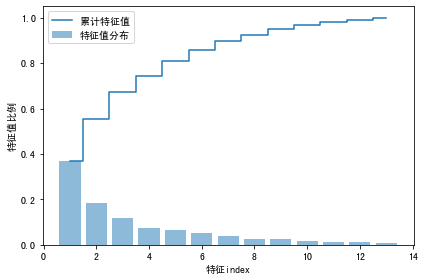

In [25]:
# 绘制图像
plt.figure()
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='特征值分布')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='累计特征值')
plt.ylabel('特征值比例')
plt.xlabel('特征index')
plt.legend(loc='best')

### 特征降维

In [26]:
# 创建列表，由(eigenvalue, eigenvector)元组构成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

In [27]:
# 按特征值从大到小对列表(eigenvalue, eigenvector)排序
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [28]:
# 特征值与特征向量
eigen_pairs

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352255,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203513,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977367,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578422,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114,

In [29]:
# 取前两个特征值对应的特征向量作为主要成分
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

In [30]:
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [31]:
# 原始特征（以第一个样本为例）
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [32]:
# 特征压缩后结果
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [33]:
# 全部特征压缩
X_train_pca = X_train_std.dot(w)

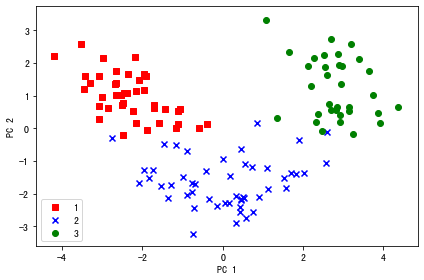

In [34]:
# 特征压缩后结果展示
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    # 按照样本的真实值进行展示
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## 使用sklearn实现PCA

sklearn中提供了进行PCA的API

### 特征值计算

In [35]:
# 实例化pca，保留所有特征
pca = PCA()

In [36]:
# 特征提取
X_train_pca = pca.fit_transform(X_train_std)
# 特征值结果
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

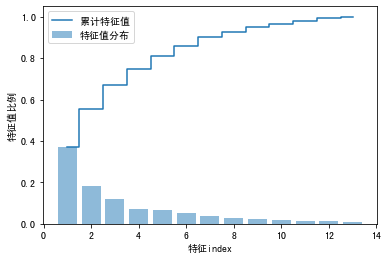

In [39]:
# 特征值绘制
# 绘制图像
plt.figure()
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='特征值分布')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='累计特征值')
plt.ylabel('特征值比例')
plt.xlabel('特征index')
plt.legend(loc='best')

### 特征降维

In [40]:
# 压缩到二维特征
pca = PCA(n_components=2)

In [41]:
# 对训练数据进行处理
X_train_pca = pca.fit_transform(X_train_std)

In [42]:
# 特征值结果(只保留两个特征)
print(pca.explained_variance_ratio_)

[0.36951469 0.18434927]


In [43]:
# 对测试集数据进行处理
X_test_pca = pca.transform(X_test_std)

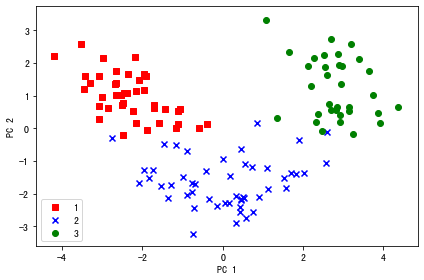

In [44]:
# 特征降维后结果展示
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    # 按照样本的真实值进行展示
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## 利用逻辑回归进行分类

### 绘制函数

In [48]:
# 绘制样本及其目标值
def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    X:样本特征值
    y:目标值
    classifier: 分类器
    """
    # 设置图像的标记及颜色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 利用样本点创建meshgrid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 预测结果
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # 绘制预测结果的等高线
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 绘制样本点,并根据真实值进行着色
    for idx, cl in enumerate(np.unique(y)):
        # 绘制散点图
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### PCA特征降维

In [45]:
# 利用PCA进行特征降维(提取)
# 保留两维特征
pca = PCA(n_components=2)
# 训练集数据处理
X_train_pca = pca.fit_transform(X_train_std)
# 测试集数据处理
X_test_pca = pca.transform(X_test_std)

### LR分类器

In [46]:
# 实例化
lr = LogisticRegression()
# 模型训练
lr = lr.fit(X_train_pca, y_train)

/Users/yaoxiaoying/.py3virtualEnv/ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yaoxiaoying/.py3virtualEnv/ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 训练数据结果

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


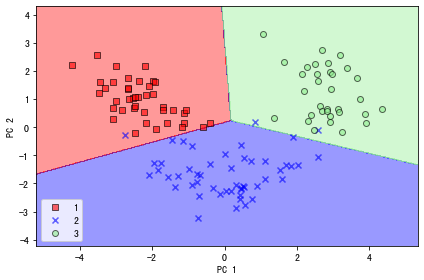

In [49]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 测试数据结果

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


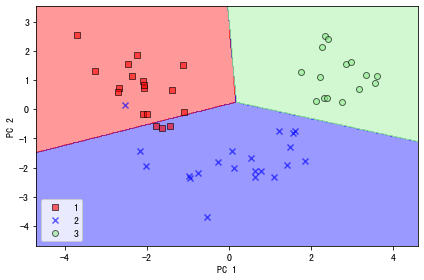

In [50]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# LDA(Linear discriminant analysis)

## LDA实现

In [51]:
# 精度设置,浮点数
np.set_printoptions(precision=4)

### 平均向量

In [52]:
# 计算每一类数据的平均向量
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



### 类内散度矩阵Sw

In [53]:
# 特征维度
d = 13 
S_W = np.zeros((d, d))
# 获取每个类别的平均值向量
for label, mv in zip(range(1, 4), mean_vecs):
    # 每一类别的散度矩阵
    class_scatter = np.zeros((d, d))  
    for row in X_train_std[y_train == label]:
        # 列向量
        row, mv = row.reshape(d, 1), mv.reshape(d, 1) 
        class_scatter += (row - mv).dot((row - mv).T)
    # 每个类别散度矩阵之和
    S_W += class_scatter                         

### 类间散度矩阵SB

In [54]:
# 全局平均值
mean_overall = np.mean(X_train_std, axis=0)
# 特征维度
d = 13  
S_B = np.zeros((d, d))
# 获取每个类别的平均值
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    # 列向量
    mean_vec = mean_vec.reshape(d, 1)  
    mean_overall = mean_overall.reshape(d, 1)  
    # 类间散度矩阵
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

### 特征值计算

求解矩阵 $S_W^{-1}S_B$的特征值和特征向量

In [55]:
# 计算LDA的特征值
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [56]:
eigen_vals

array([ 0.0000e+00+0.0000e+00j,  4.2257e+00+0.0000e+00j,
        8.2625e+00+0.0000e+00j, -1.2454e-15+0.0000e+00j,
        5.3485e-16+2.0059e-16j,  5.3485e-16-2.0059e-16j,
        2.3023e-16+2.2646e-16j,  2.3023e-16-2.2646e-16j,
       -3.0897e-16+2.9887e-16j, -3.0897e-16-2.9887e-16j,
       -3.4712e-18+0.0000e+00j, -2.7022e-16+0.0000e+00j,
       -2.0974e-16+0.0000e+00j])

### 特征值分布

In [58]:
# 创建由特征值和特征向量组成的list
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 根据特征值从大到小排序(eigenvalue, eigenvector)
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 特征值结果
for eigen_val in eigen_pairs:
    print(eigen_val[0])

8.262493673957486
4.225659486916685
1.2454365753641987e-15
5.71224762018794e-16
5.71224762018794e-16
4.298731032916801e-16
4.298731032916801e-16
3.2293605074486046e-16
3.2293605074486046e-16
2.702165077415812e-16
2.0974269802096344e-16
3.4711688834518034e-18
0.0


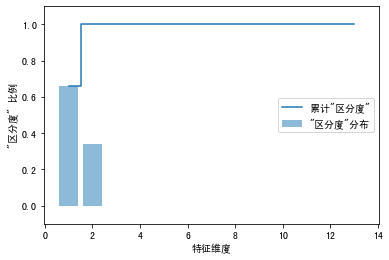

In [61]:
# 实部求和
tot = sum(eigen_vals.real)
# 计算比例
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
# 累计求和
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='"区分度"分布')
plt.step(range(1, 14), cum_discr, where='mid',
         label='累计"区分度"')
plt.ylabel('"区分度" 比例')
plt.xlabel('特征维度')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

### 特征降维

In [62]:
# 保留两维特征
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))

In [63]:
w

array([[-0.1586, -0.4077],
       [ 0.0984, -0.1821],
       [-0.0156, -0.3473],
       [ 0.1588,  0.3095],
       [-0.0207, -0.064 ],
       [ 0.1884,  0.0733],
       [-0.7153,  0.3034],
       [-0.0798, -0.0009],
       [ 0.0074,  0.0716],
       [ 0.3448, -0.2808],
       [-0.0254,  0.244 ],
       [-0.3192, -0.0459],
       [-0.4054, -0.5806]])

In [64]:
# 特征降维
X_train_lda = X_train_std.dot(w)

In [66]:
# 降维前
X_test_std[0]

array([ 0.8944, -0.3881,  1.1007, -0.812 ,  1.132 ,  1.0981,  0.712 ,
        0.181 ,  0.0663,  0.5129,  0.7963,  0.4483,  1.9059])

In [67]:
# 降维后
X_train_lda[0]

array([ 1.2617, -0.6537])

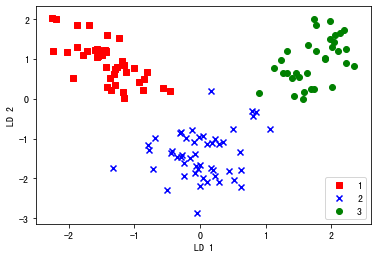

In [68]:
# 结果绘制
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

## 使用sklearn实现LDA并进行LR分类

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# 实例化
lda = LDA(n_components=2)

In [70]:
# 对训练数据进行LDA处理
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [73]:
X_train_lda[0]

array([2.9646, 1.157 ])

In [71]:
# 实例化逻辑回归
lr = LogisticRegression()
# 训练
lr = lr.fit(X_train_lda, y_train)

/Users/yaoxiaoying/.py3virtualEnv/ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yaoxiaoying/.py3virtualEnv/ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


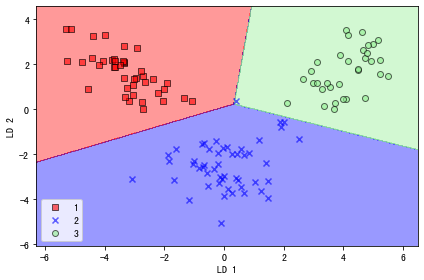

In [74]:
# 训练数据结果
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


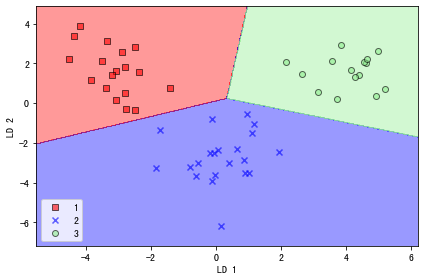

In [75]:
# 测试数据结果
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# kernel PCA 

对于线性不可分的数据,在降维时可以使用带核函数的PCA

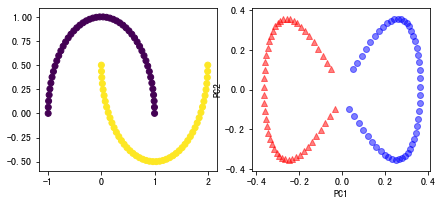

In [80]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons
# 数据生成
X, y = make_moons(n_samples=100, random_state=123)
# 实例化
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
# 数据处理
X_skernpca = scikit_kpca.fit_transform(X)
# 结果绘制
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X[:,0],X[:,1],marker='o',c=y) 

ax[1].scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()